### 15-plots in plotly

In [26]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [27]:
# import dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [29]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### 1. SCATTER PLOT

In [30]:
fig1 = px.scatter(df, x='sepal_length',y='sepal_width', color='species')
fig1.show()

# save the plot
fig1.write_image("./outputs/fig1.png", scale=3)

### 2. Line plot

In [31]:
#sort the data
df_line = df.sort_values(by=['sepal_width'])

fig2 = px.line(df, x='sepal_length', y='sepal_width',color='species')
fig2.show()

# save the plot
fig2.write_image("./outputs/fig2.png",scale=3)

### 3. BAR PLOT

In [32]:
# group values based on means
df_bar = df.groupby(['species']).mean().reset_index()
df_bar.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [33]:
fig3 = px.bar(df_bar, x ='species',  y='sepal_width')
fig3.show()

# save the plot
fig3.write_image("./outputs/fig3.png",scale=3)

<Axes: xlabel='species', ylabel='sepal_width'>

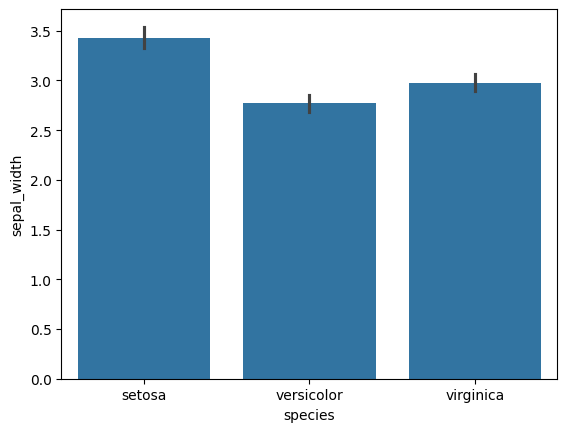

In [34]:
# seaborn does not need to make mean groups

sns.barplot(df, x='species', y='sepal_width')

### 4. BOX PLOT

In [35]:
fig4 = px.box(df, x='species' , y='sepal_width',color='species')
fig4.show()

#save the plot
fig4.write_image('./outputs/fig4.png', scale=3)

### 5. violon plot

In [36]:
import plotly.express as px

In [37]:
fig5 = px.violin(df, x='species' , y='sepal_width',color='species',box=True)
fig5.show()

#save the plot
fig5.write_image('./outputs/fig5.png', scale=3)

### 6. Histogram

In [38]:
fig6 = px.histogram(df, x='sepal_width',color='species')
fig6.show()

#save the plot
fig6.write_image('./outputs/fig6.png', scale=3)

### 7. pie chart

In [39]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [40]:
df_pie = df['species'].value_counts().reset_index()
df_pie.columns = ['species','count']
fig7 = px.pie(df_pie, values='count',names='species')
fig7.show()

#save the plot
fig7.write_image('./outputs/fig7.png', scale=3)

### 8. scatter 3d plot

In [41]:
import plotly.express as px
import pandas as pd


# Create the 3D scatter plot
fig8 = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width', color='species')

# Show the plot
fig8.show()

# Save the plot as an HTML file
fig8.write_html("./outputs/fig8.html")

### 9. Area chart

In [44]:

df_area = df.sort_values(by=['sepal_length'])

fig9 = px.area(df_area, x='sepal_length', y='sepal_width', color='species')
fig9.show()

#save the plot
fig9.write_image("./outputs/fig9.png", scale=3)

### 10 Bubble chart

In [47]:
fig10 = px.scatter(df, x='sepal_length', y='sepal_width',size='petal_length',color='species')
fig10.show()

# save the plot
fig10.write_image('./outputs/fig10.png',scale=3)

### 3.sunburst chart

In [51]:
df_sunburst = df.groupby(['species','petal_length','petal_width']).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=['species','petal_width'], values='counts')
fig11.show()

# save this plot as html
fig11.write_html('./outputs/fig11.html')

# save this plot in png
fig11.write_image('./outputs/fig11.png')

### 12. parallel coordinates plot



In [58]:
# Add a numeric species_id based on species name for coloring
df['species_id'] = df['species'].astype('category').cat.codes

# Parallel coordinates plot
fig12 = px.parallel_coordinates(df, color='species_id', labels={'species_id': 'species'})

# Show the plot
fig12.show()

# Save the plot in HTML
fig12.write_html("./outputs/fig12.html")

# Save plot as PNG (ensure kaleido is installed)
fig12.write_image('./outputs/fig12.png')

### 13. Desity contour plot

In [60]:
fig13 = px.density_contour(df, x='sepal_length', y = 'sepal_width',color='species')
fig13.show()

# save a plot
fig13.write_image("./outputs/fig13.png" , scale=3)


### 14. ternary plot

In [62]:
fig14 = px.scatter_ternary(df, a='sepal_length', b='sepal_width', c= 'petal_width', color='species')
fig14.show()

# save the plot
fig14.write_image("./outputs/fig14.png")

### 15. polar chart (radar chart)

In [63]:
df_radar = df.groupby(['species']).mean().reset_index()

fig15 = px.line_polar(df_radar, r='sepal_length', theta= 'species', line_close=True)
fig15.show()

# save the plot
fig15.write_image("./outputs/fig15.png")